In [1]:
import pandas as pd
import numpy as np
import missing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import janitor

In [7]:
riskfactors = pd.read_csv("./data/riskfactors.csv")
riskfactors.head(2)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0


In [4]:
implicit_df = pd.DataFrame(
    {
        'name': ['lynn', np.nan, 'zelda', np.nan, 'shadowsong', np.nan],
        'time': ['morning', 'afternoon'] * 3,
        'value': [350, 310, 320, 350, 310, 320]
    }
)

implicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [5]:
implicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


Imputación de un único valor

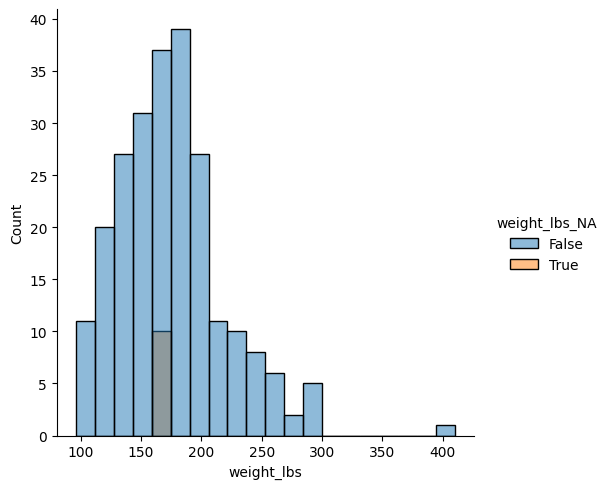

In [24]:
(
    riskfactors
    .select('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string= True, false_string= False)
    .apply(
        axis= 'rows',
        func= lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data= df,
                x= 'weight_lbs',
                hue= 'weight_lbs_NA',
                alpha= 0.5
            )
        )
    )
)

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

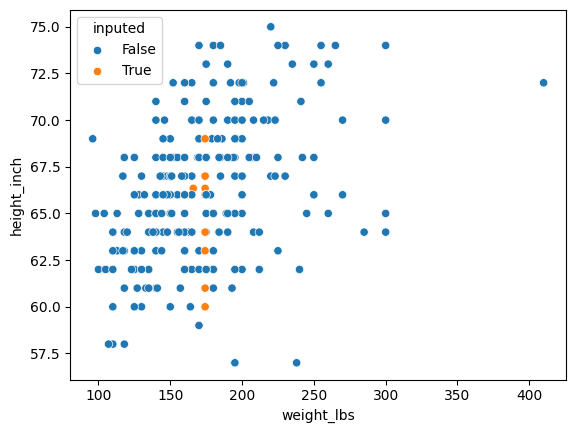

In [26]:
(
    riskfactors
    .select('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string= True, false_string= False)
    .apply(
        axis= 'rows',
        func= lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .assign(
        inputed= lambda df: df["weight_lbs_NA"] | df["height_inch_NA"]
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data= df,
                x= 'weight_lbs',
                y= 'height_inch',
                hue= 'inputed'
            )
        )
    )
)